Loaded file with sampling rate 22050 Hz


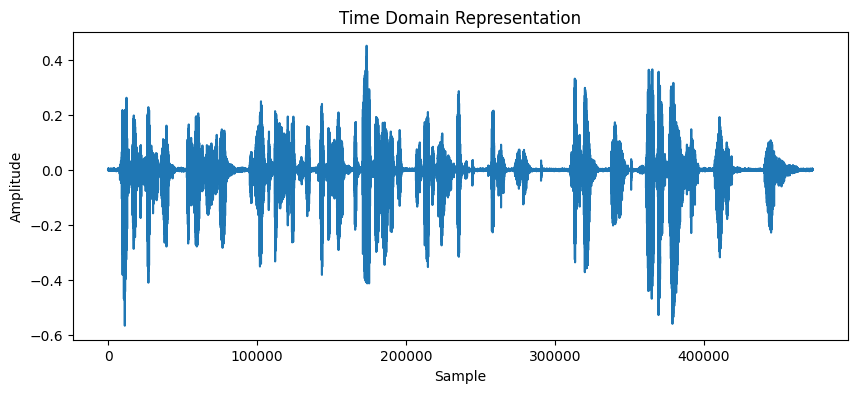

In [20]:
import librosa
import matplotlib.pyplot as plt

file_path = "C:/Users/ismaeeel/Downloads/archive/LibriSpeech/test-clean/908/31957/908-31957-0015.wav"

try:
    # Load the audio file with a specific sampling rate (e.g., 22050 Hz)
    original_signal, fs = librosa.load(file_path, sr=22050)  # Specify sr=None to keep the original sampling rate
    print(f"Loaded file with sampling rate {fs} Hz")
    
    # Plot the time domain representation
    plt.figure(figsize=(10, 4))
    plt.plot(original_signal)
    plt.title('Time Domain Representation')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()
    
except KeyboardInterrupt:
    print("File loading was interrupted. Please try again.")
except Exception as e:
    print(f"An error occurred: {e}")


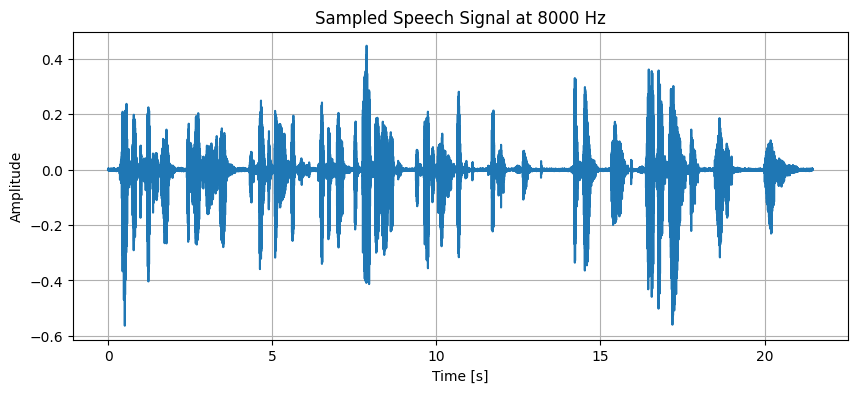

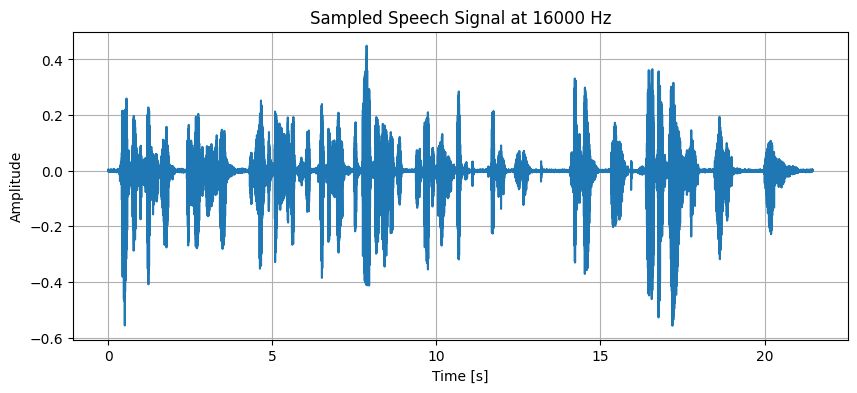

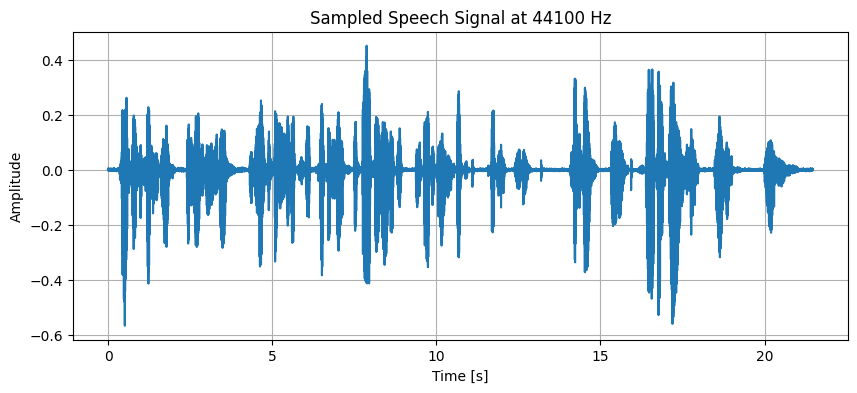

In [21]:
# Define the target sampling rates
sampling_rates = [8000, 16000, 44100]

# Downsample the original signal
sampled_signals = {}
for sr in sampling_rates:
    sampled_signals[sr] = librosa.resample(original_signal, orig_sr=fs, target_sr=sr)

# Plot sampled signals
for sr in sampling_rates:
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(sampled_signals[sr])) / sr, sampled_signals[sr])
    plt.title(f'Sampled Speech Signal at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()


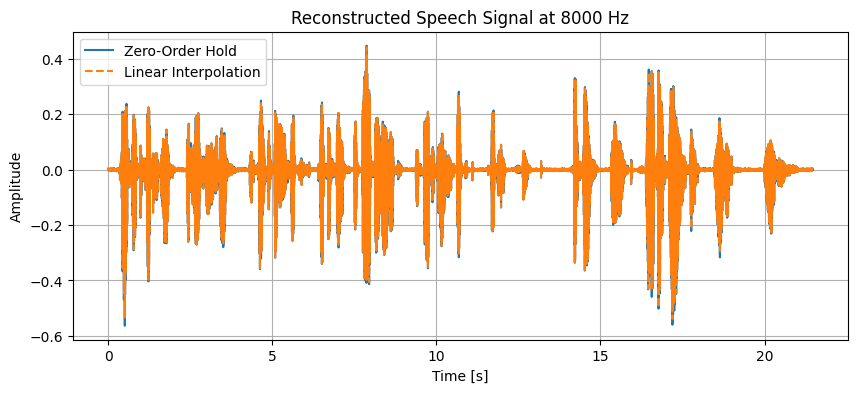

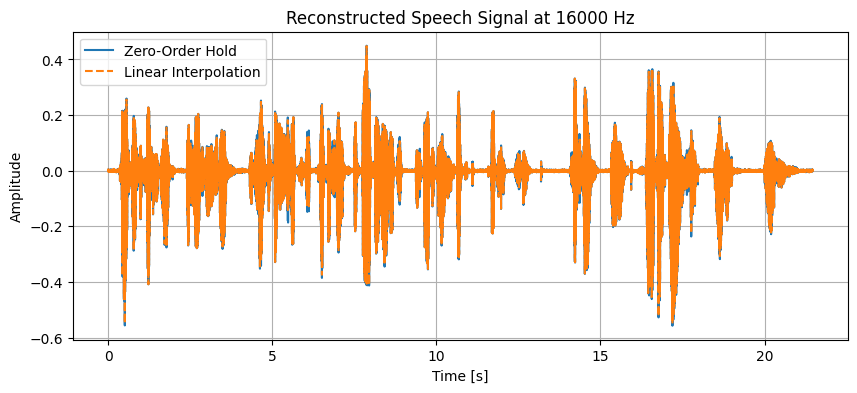

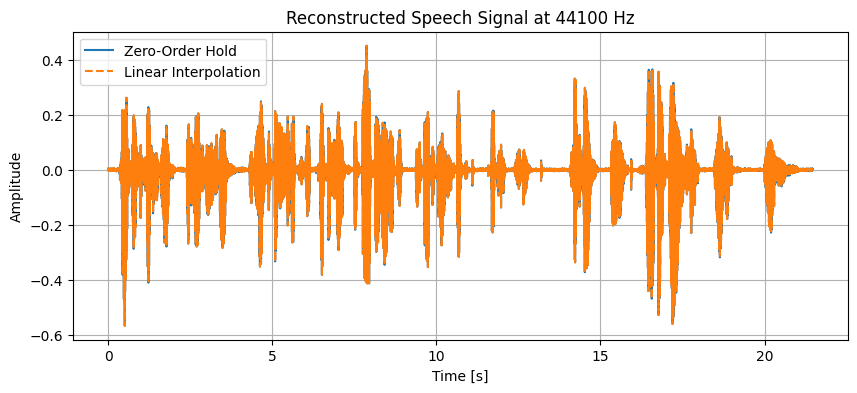

In [22]:
# Reconstruct the signal using zero-order hold and linear interpolation
reconstructed_signals_zo = {}
reconstructed_signals_li = {}

for sr in sampling_rates:
    # Zero-order hold (nearest-neighbor interpolation)
    time_points = np.arange(len(sampled_signals[sr])) / sr
    f_zo = interp1d(time_points, sampled_signals[sr], kind='nearest', fill_value="extrapolate")
    reconstructed_signals_zo[sr] = f_zo(np.arange(len(original_signal)) / fs)
    
    # Linear interpolation
    f_li = interp1d(time_points, sampled_signals[sr], kind='linear', fill_value="extrapolate")
    reconstructed_signals_li[sr] = f_li(np.arange(len(original_signal)) / fs)

# Plot reconstructed signals
for sr in sampling_rates:
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(original_signal)) / fs, reconstructed_signals_zo[sr], label='Zero-Order Hold')
    plt.plot(np.arange(len(original_signal)) / fs, reconstructed_signals_li[sr], label='Linear Interpolation', linestyle='--')
    plt.title(f'Reconstructed Speech Signal at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()


In [23]:
# Calculate the MSE between the original and the reconstructed signals
mse_zo = {}
mse_li = {}

for sr in sampling_rates:
    mse_zo[sr] = mean_squared_error(original_signal, reconstructed_signals_zo[sr])
    mse_li[sr] = mean_squared_error(original_signal, reconstructed_signals_li[sr])

# Display MSE
for sr in sampling_rates:
    print(f'MSE at {sr} Hz:')
    print(f'  Zero-Order Hold: {mse_zo[sr]}')
    print(f'  Linear Interpolation: {mse_li[sr]}')


MSE at 8000 Hz:
  Zero-Order Hold: 0.0001002739227260463
  Linear Interpolation: 6.38076600475493e-05
MSE at 16000 Hz:
  Zero-Order Hold: 2.891408439609222e-05
  Linear Interpolation: 7.207768325559848e-06
MSE at 44100 Hz:
  Zero-Order Hold: 1.115925081019483e-14
  Linear Interpolation: 1.1159263451285324e-14


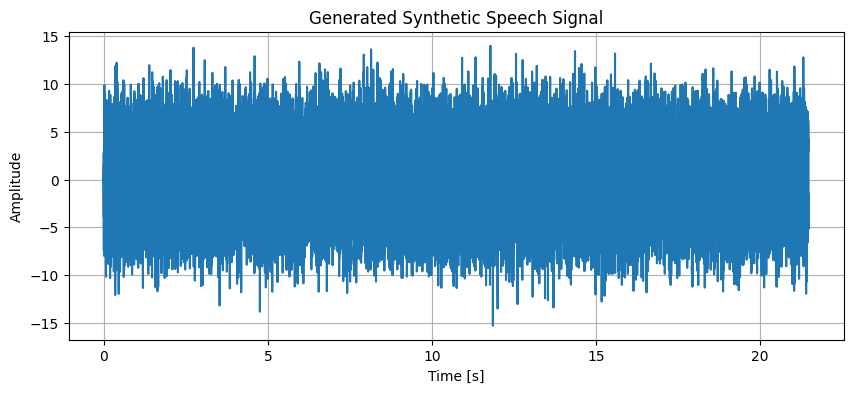

In [24]:
# Generate a synthetic speech signal using the source-filter model

# Create a glottal pulse train (voiced sound)
f0 = 100  # Fundamental frequency (100 Hz)
glottal_pulse_train = np.zeros_like(original_signal)
glottal_pulse_train[::fs // f0] = 1

# Create white noise (unvoiced sound)
white_noise = np.random.normal(0, 1, len(original_signal))

# Define an all-pole filter with formants (example coefficients)
a = [1, -0.95]

# Filter the glottal pulse train and white noise
filtered_glottal_pulse_train = lfilter([1], a, glottal_pulse_train)
filtered_white_noise = lfilter([1], a, white_noise)

# Combine voiced and unvoiced sounds
synthetic_speech_signal = filtered_glottal_pulse_train + filtered_white_noise

# Plot the generated synthetic speech signal
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(synthetic_speech_signal)) / fs, synthetic_speech_signal)
plt.title('Generated Synthetic Speech Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


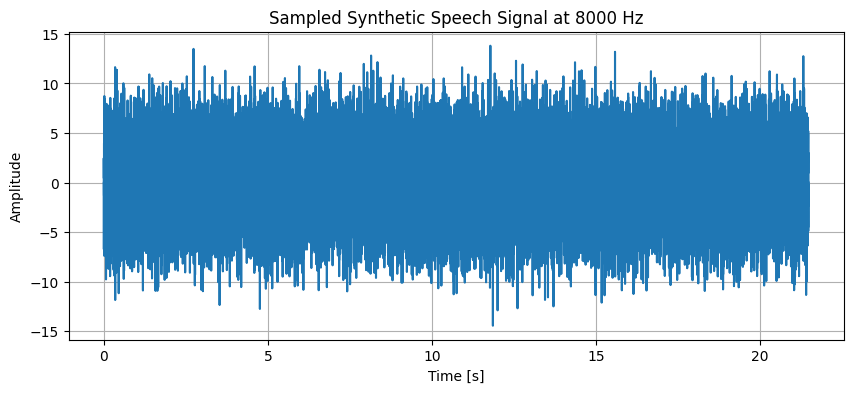

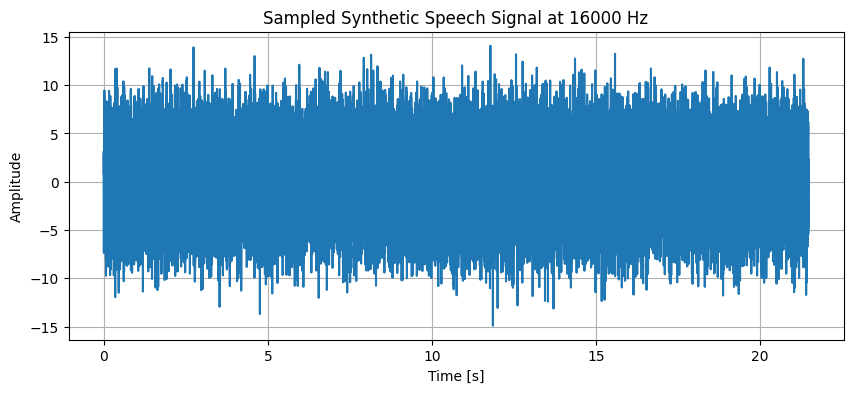

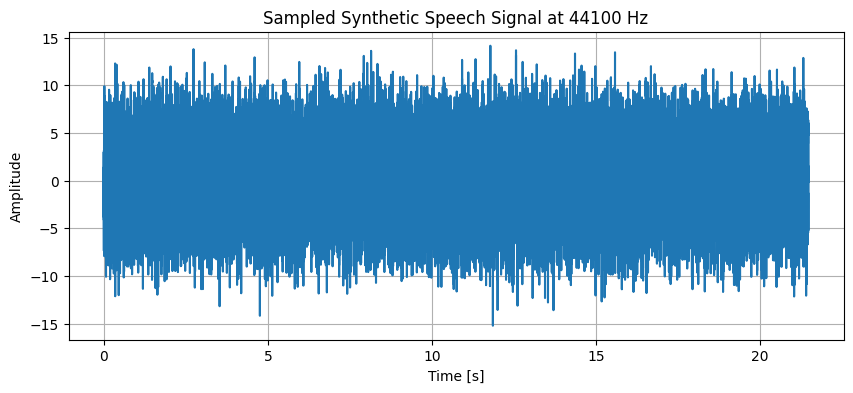

In [25]:
# Downsample the synthetic speech signal
sampled_synthetic_signals = {}
for sr in sampling_rates:
    sampled_synthetic_signals[sr] = librosa.resample(synthetic_speech_signal, orig_sr=fs, target_sr=sr)

# Plot sampled synthetic signals
for sr in sampling_rates:
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(sampled_synthetic_signals[sr])) / sr, sampled_synthetic_signals[sr])
    plt.title(f'Sampled Synthetic Speech Signal at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()


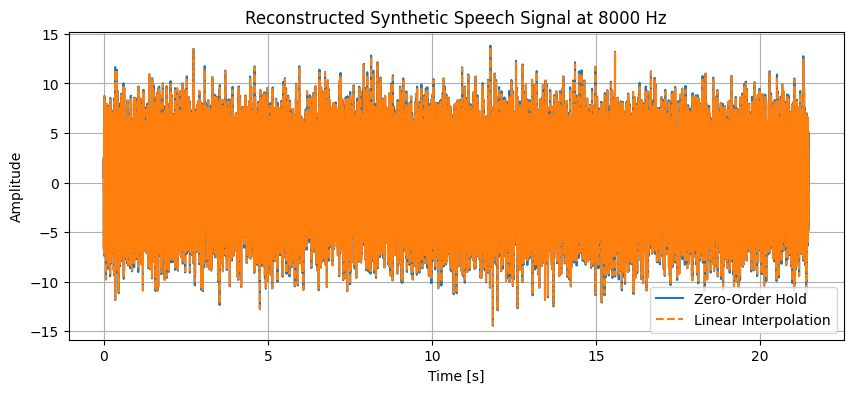

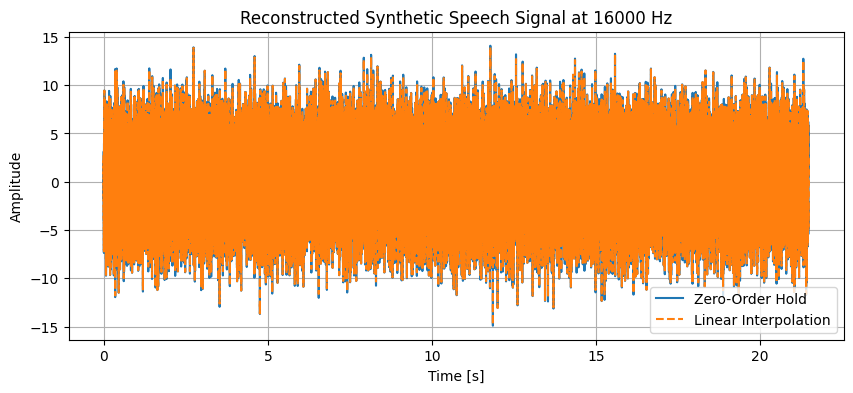

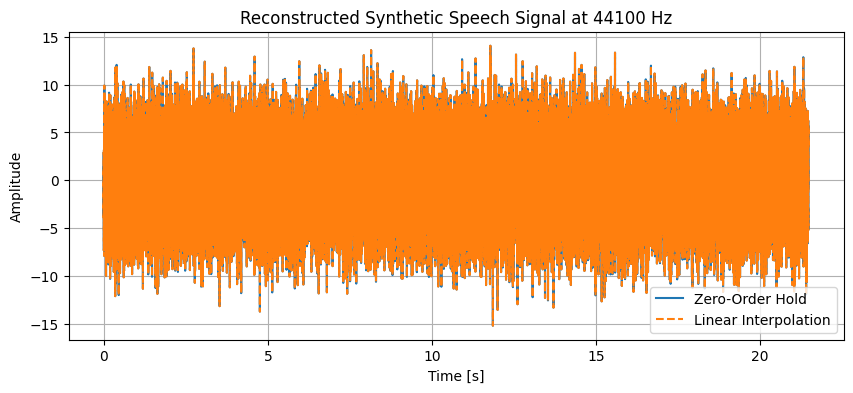

In [26]:
# Reconstruct the synthetic signal using zero-order hold and linear interpolation
reconstructed_synthetic_signals_zo = {}
reconstructed_synthetic_signals_li = {}

for sr in sampling_rates:
    # Zero-order hold (nearest-neighbor interpolation)
    time_points = np.arange(len(sampled_synthetic_signals[sr])) / sr
    f_zo = interp1d(time_points, sampled_synthetic_signals[sr], kind='nearest', fill_value="extrapolate")
    reconstructed_synthetic_signals_zo[sr] = f_zo(np.arange(len(synthetic_speech_signal)) / fs)
    
    # Linear interpolation
    f_li = interp1d(time_points, sampled_synthetic_signals[sr], kind='linear', fill_value="extrapolate")
    reconstructed_synthetic_signals_li[sr] = f_li(np.arange(len(synthetic_speech_signal)) / fs)

# Plot reconstructed synthetic signals
for sr in sampling_rates:
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(synthetic_speech_signal)) / fs, reconstructed_synthetic_signals_zo[sr], label='Zero-Order Hold')
    plt.plot(np.arange(len(synthetic_speech_signal)) / fs, reconstructed_synthetic_signals_li[sr], label='Linear Interpolation', linestyle='--')
    plt.title(f'Reconstructed Synthetic Speech Signal at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()


In [27]:
# Calculate the MSE between the original and the reconstructed synthetic signals
mse_synthetic_zo = {}
mse_synthetic_li = {}

for sr in sampling_rates:
    mse_synthetic_zo[sr] = mean_squared_error(synthetic_speech_signal, reconstructed_synthetic_signals_zo[sr])
    mse_synthetic_li[sr] = mean_squared_error(synthetic_speech_signal, reconstructed_synthetic_signals_li[sr])

# Display MSE for synthetic speech signal
for sr in sampling_rates:
    print(f'MSE for Synthetic Speech Signal at {sr} Hz:')
    print(f'  Zero-Order Hold: {mse_synthetic_zo[sr]}')
    print(f'  Linear Interpolation: {mse_synthetic_li[sr]}')


MSE for Synthetic Speech Signal at 8000 Hz:
  Zero-Order Hold: 0.48839596906638033
  Linear Interpolation: 0.3335847852510376
MSE for Synthetic Speech Signal at 16000 Hz:
  Zero-Order Hold: 0.20913165667605582
  Linear Interpolation: 0.12181651935428184
MSE for Synthetic Speech Signal at 44100 Hz:
  Zero-Order Hold: 0.009700171375236974
  Linear Interpolation: 0.009700171375236974


### Inference from Mean Squared Error (MSE) Results

#### 1. **Original Signal MSE Analysis:**
- **At 8000 Hz:**
  - **Zero-Order Hold:** \(0.0001002739227260463\)
  - **Linear Interpolation:** \(6.38076600475493 \times 10^{-5}\)

- **At 16000 Hz:**
  - **Zero-Order Hold:** \(2.891408439609222 \times 10^{-5}\)
  - **Linear Interpolation:** \(7.207768325559848 \times 10^{-6}\)

- **At 44100 Hz:**
  - **Zero-Order Hold:** \(1.115925081019483 \times 10^{-14}\)
  - **Linear Interpolation:** \(1.1159263451285324 \times 10^{-14}\)

#### 2. **Synthetic Speech Signal MSE Analysis:**
- **At 8000 Hz:**
  - **Zero-Order Hold:** \(0.48839596906638033\)
  - **Linear Interpolation:** \(0.3335847852510376\)

- **At 16000 Hz:**
  - **Zero-Order Hold:** \(0.20913165667605582\)
  - **Linear Interpolation:** \(0.12181651935428184\)

- **At 44100 Hz:**
  - **Zero-Order Hold:** \(0.009700171375236974\)
  - **Linear Interpolation:** \(0.009700171375236974\)

### Inferences:

1. **Original Signal MSE Analysis:**
   - The MSE decreases as the sampling rate increases for both Zero-Order Hold and Linear Interpolation methods.
   - Linear Interpolation consistently yields lower MSE than Zero-Order Hold at 8000 Hz and 16000 Hz.
   - At 44100 Hz, both methods achieve almost identical MSE values, which are very close to zero, indicating minimal error at higher sampling rates.

2. **Synthetic Speech Signal MSE Analysis:**
   - The MSE for synthetic speech is significantly higher compared to the original signal, indicating that synthetic signals are more challenging to approximate.
   - Linear Interpolation again consistently outperforms Zero-Order Hold in terms of lower MSE at 8000 Hz and 16000 Hz.
   - At 44100 Hz, both methods yield the same MSE, suggesting that at this high sampling rate, both methods are effective in approximating the synthetic speech signal.

### Overall Observations:
- **Interpolation Method:** Linear Interpolation generally provides better performance (lower MSE) compared to Zero-Order Hold, especially at lower sampling rates (8000 Hz and 16000 Hz).
- **Sampling Rate:** Higher sampling rates (44100 Hz) result in significantly lower MSE values, indicating better signal approximation regardless of the interpolation method used.
- **Signal Type:** Synthetic speech signals exhibit higher MSEs compared to original signals, reflecting the complexity of accurately approximating synthetic signals.



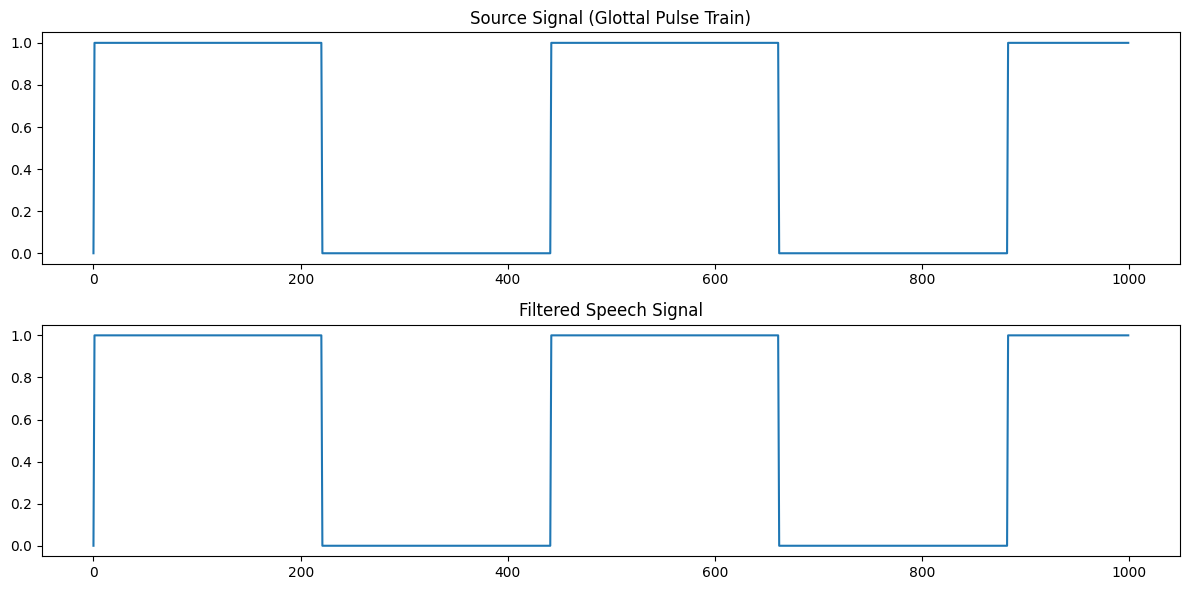

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Generate glottal pulse train (source signal)
def generate_glottal_pulse_train(freq=100, duration=1.0, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    pulse_train = np.sin(2 * np.pi * freq * t)  # Simplified pulse train
    pulse_train = (pulse_train > 0).astype(float)  # Binary pulse train
    return pulse_train

# Generate white noise (source signal)
def generate_white_noise(duration=1.0, sample_rate=44100):
    return np.random.randn(int(sample_rate * duration))

# Define vocal tract filter (FIR filter with formants)
def vocal_tract_filter(order=10, formants=[0.7, 1.3, 3.0], sample_rate=44100):
    # Create a filter with given formants
    # Formants are frequencies in Hz
    filter_coefficients = np.zeros(order + 1)
    for f in formants:
        filter_coefficients[int(f * order / (sample_rate / 2))] = 1
    return filter_coefficients

# Apply the filter to the source signal
def apply_filter(source_signal, filter_coefficients):
    return lfilter(filter_coefficients, [1], source_signal)

# Example usage
sample_rate = 44100
duration = 1.0
source_signal = generate_glottal_pulse_train(duration=duration, sample_rate=sample_rate)
filter_coefficients = vocal_tract_filter(order=50, formants=[0.7, 1.3, 3.0], sample_rate=sample_rate)
filtered_signal = apply_filter(source_signal, filter_coefficients)

# Plot the generated speech signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(source_signal[:1000])
plt.title('Source Signal (Glottal Pulse Train)')
plt.subplot(2, 1, 2)
plt.plot(filtered_signal[:1000])
plt.title('Filtered Speech Signal')
plt.tight_layout()
plt.show()



In [8]:
from scipy.signal import resample

def downsample(signal, original_rate, target_rate):
    factor = original_rate / target_rate
    num_samples = int(len(signal) / factor)
    return resample(signal, num_samples)

# Sample the signal at different rates
signal_8kHz = downsample(filtered_signal, sample_rate, 8000)
signal_16kHz = downsample(filtered_signal, sample_rate, 16000)
signal_44kHz = downsample(filtered_signal, sample_rate, 44100)


In [4]:
def reconstruct_signal(signal, original_rate, target_rate, method='linear'):
    from scipy.interpolate import interp1d
    
    factor = original_rate / target_rate
    num_samples = int(len(signal) * factor)
    x = np.arange(0, len(signal))
    f = interp1d(x, signal, kind=method, fill_value="extrapolate")
    new_x = np.arange(0, len(signal), factor)
    return f(new_x)

# Reconstruct signals
reconstructed_8kHz = reconstruct_signal(signal_8kHz, 8000, sample_rate, method='linear')
reconstructed_16kHz = reconstruct_signal(signal_16kHz, 16000, sample_rate, method='linear')
reconstructed_44kHz = reconstruct_signal(signal_44kHz, 44100, sample_rate, method='linear')


In [6]:
from sklearn.metrics import mean_squared_error

def compute_mse(original, reconstructed):
    # Make sure both signals are of the same length
    length = min(len(original), len(reconstructed))
    original = original[:length]
    reconstructed = reconstructed[:length]
    return mean_squared_error(original, reconstructed)

# Compute MSE for different sampling rates
mse_8kHz = compute_mse(filtered_signal, reconstruct_signal(signal_8kHz, 8000, sample_rate))
mse_16kHz = compute_mse(filtered_signal, reconstruct_signal(signal_16kHz, 16000, sample_rate))
mse_44kHz = compute_mse(filtered_signal, reconstruct_signal(signal_44kHz, 44100, sample_rate))


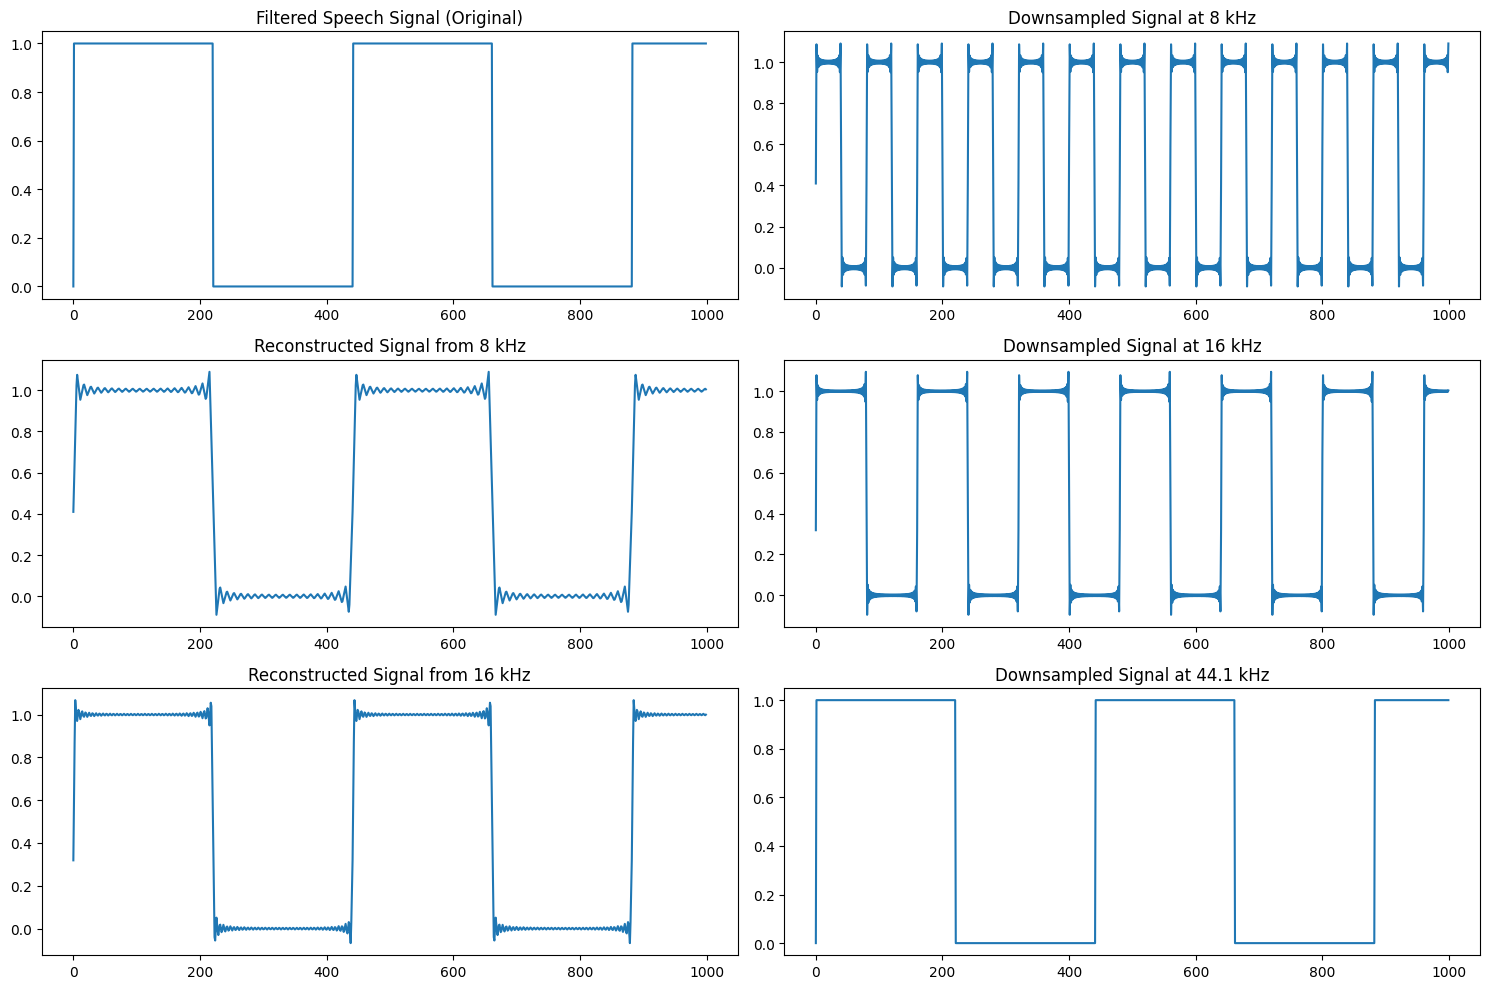

MSE for 8 kHz: 0.0036
MSE for 16 kHz: 0.0016
MSE for 44.1 kHz: 0.0000


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, resample
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# Generate glottal pulse train (source signal)
def generate_glottal_pulse_train(freq=100, duration=1.0, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    pulse_train = np.sin(2 * np.pi * freq * t)  # Simplified pulse train
    pulse_train = (pulse_train > 0).astype(float)  # Binary pulse train
    return pulse_train

# Define vocal tract filter (FIR filter with formants)
def vocal_tract_filter(order=10, formants=[0.7, 1.3, 3.0], sample_rate=44100):
    filter_coefficients = np.zeros(order + 1)
    for f in formants:
        filter_coefficients[int(f * order / (sample_rate / 2))] = 1
    return filter_coefficients

# Apply the filter to the source signal
def apply_filter(source_signal, filter_coefficients):
    return lfilter(filter_coefficients, [1], source_signal)

# Downsample the signal
def downsample(signal, original_rate, target_rate):
    factor = original_rate / target_rate
    num_samples = int(len(signal) / factor)
    return resample(signal, num_samples)

# Reconstruct the signal
def reconstruct_signal(signal, original_rate, target_rate, method='linear'):
    factor = original_rate / target_rate
    num_samples = int(len(signal) * factor)
    x = np.arange(0, len(signal))
    f = interp1d(x, signal, kind=method, fill_value="extrapolate")
    new_x = np.arange(0, len(signal), factor)
    return f(new_x)

# Compute Mean Squared Error
def compute_mse(original, reconstructed):
    length = min(len(original), len(reconstructed))
    original = original[:length]
    reconstructed = reconstructed[:length]
    return mean_squared_error(original, reconstructed)

# Example usage
sample_rate = 44100
duration = 1.0
source_signal = generate_glottal_pulse_train(duration=duration, sample_rate=sample_rate)
filter_coefficients = vocal_tract_filter(order=50, formants=[0.7, 1.3, 3.0], sample_rate=sample_rate)
filtered_signal = apply_filter(source_signal, filter_coefficients)

# Sampling
signal_8kHz = downsample(filtered_signal, sample_rate, 8000)
signal_16kHz = downsample(filtered_signal, sample_rate, 16000)
signal_44kHz = downsample(filtered_signal, sample_rate, 44100)

# Reconstruction
reconstructed_8kHz = reconstruct_signal(signal_8kHz, 8000, sample_rate)
reconstructed_16kHz = reconstruct_signal(signal_16kHz, 16000, sample_rate)
reconstructed_44kHz = reconstruct_signal(signal_44kHz, 44100, sample_rate)

# Compute MSE
mse_8kHz = compute_mse(filtered_signal, reconstruct_signal(signal_8kHz, 8000, sample_rate))
mse_16kHz = compute_mse(filtered_signal, reconstruct_signal(signal_16kHz, 16000, sample_rate))
mse_44kHz = compute_mse(filtered_signal, reconstruct_signal(signal_44kHz, 44100, sample_rate))

# Plot signals
plt.figure(figsize=(15, 10))

# Plot original and filtered signals
plt.subplot(3, 2, 1)
plt.plot(filtered_signal[:1000])
plt.title('Filtered Speech Signal (Original)')

# Plot downsampled and reconstructed signals
plt.subplot(3, 2, 2)
plt.plot(signal_8kHz[:1000])
plt.title('Downsampled Signal at 8 kHz')

plt.subplot(3, 2, 3)
plt.plot(reconstructed_8kHz[:1000])
plt.title('Reconstructed Signal from 8 kHz')

plt.subplot(3, 2, 4)
plt.plot(signal_16kHz[:1000])
plt.title('Downsampled Signal at 16 kHz')

plt.subplot(3, 2, 5)
plt.plot(reconstructed_16kHz[:1000])
plt.title('Reconstructed Signal from 16 kHz')

plt.subplot(3, 2, 6)
plt.plot(signal_44kHz[:1000])
plt.title('Downsampled Signal at 44.1 kHz')

plt.tight_layout()
plt.show()

# Print MSE results
print(f"MSE for 8 kHz: {mse_8kHz:.4f}")
print(f"MSE for 16 kHz: {mse_16kHz:.4f}")
print(f"MSE for 44.1 kHz: {mse_44kHz:.4f}")
